<a href="https://colab.research.google.com/github/czapata-ande/ai-frameworks/blob/main/Arima_Eolica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘tensorA’, ‘distributional’, ‘TTR’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘quadprog’, ‘quantmod’, ‘inline’, ‘gridExtra’, ‘loo’, ‘QuickJSR’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘dygraphs’, ‘extraDistr’, ‘RcppParallel’, ‘rstan’, ‘rstantools’, ‘StanHeaders’, ‘xts’, ‘BH’, ‘RcppEigen’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:Metrics’:

    accuracy




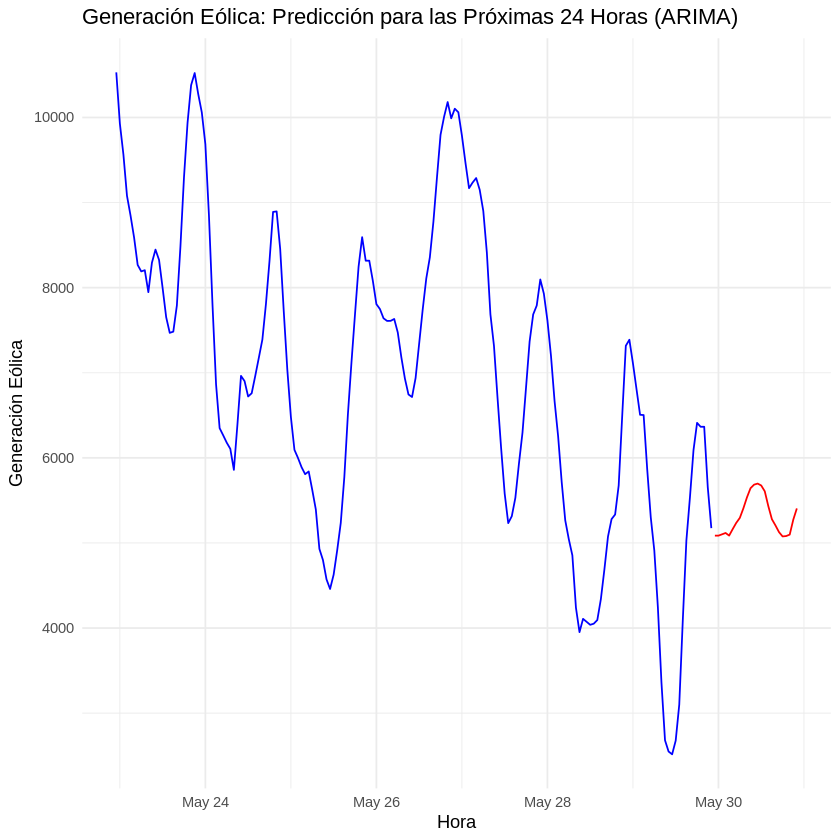

Métricas de Evaluación:
RMSE: 1768.9 
MSE: 3129009 
MAE: 1478.914 
R2: 0.9592607 


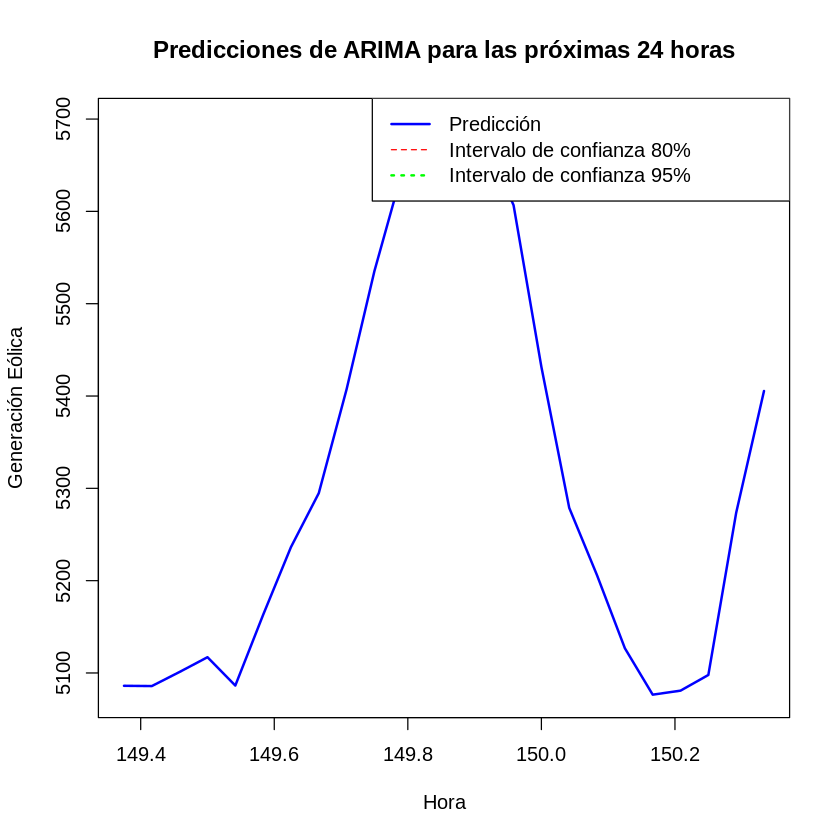

In [4]:
# ADVERTENCIA: Si va ejecutarlo en el Colab, cambie el Ambiente de Ejecución para R
# Instalar las librerías necesarias (si no están instaladas)
install.packages(c("forecast", "prophet", "dplyr"))

# Librerías necesarias
library(forecast)
library(ggplot2)
library(readr)

# Leer y preparar los datos desde la URL
url1 <- "https://raw.githubusercontent.com/vneumannufprbr/TrabajosRStudio/main/energy_dataset.csv" # Dataset con 3.500 instancias
data<- read.csv(url1, stringsAsFactors = FALSE)

#url <-  "https://raw.githubusercontent.com/vneumannufprbr/Series-Temporales/main/energy_dataset.csv" # Dataset con 35.000 instancias
#data <- read.csv(url) # Dataset con 35.000 instancias # dtype=dtype_dict,

# Leer los datos desde el computador
# data <- read.csv("Practica-Prediccion-Series-Temporales/energy_dataset.csv")

# Convertir la columna de tiempo al formato adecuado
data$time <- as.POSIXct(data$time, format="%Y-%m-%d %H:%M:%S", tz="UTC")

# Seleccionar la columna 'total load actual'
data <- data[, c("time", "generation.wind.onshore")]

# Eliminar filas con valores nulos
data <- na.omit(data)

# Convertir la columna de demanda a una serie temporal (asumimos frecuencia de datos por hora)
ts_data <- ts(data$generation.wind.onshore, frequency = 24)  # 24 observaciones diarias

# Ajustar el modelo ARIMA a la serie temporal
fit <- auto.arima(ts_data)

# Hacer predicciones para las próximas 24 horas
forecasted <- forecast(fit, h = 24)

# Crear dataframe para graficar
df_forecast <- data.frame(
  time = seq(max(data$time) + 3600, by = "hour", length.out = 24),
  generation.wind.onshore = as.numeric(forecasted$mean)
)

# Graficar los últimos 7 días de datos históricos y las predicciones para las próximas 24 horas
ggplot() +
  geom_line(data = tail(data, 7*24), aes(x = time, y = generation.wind.onshore), color = "blue") +  # Últimos 7 días de datos históricos
  geom_line(data = df_forecast, aes(x = time, y = generation.wind.onshore), color = "red") +  # Predicciones de 24 horas
  labs(title = "Generación Eólica: Predicción para las Próximas 24 Horas (ARIMA)",
       x = "Hora", y = "Generación Eólica") +
  theme_minimal()


# Visualizar las predicciones para las próximas 24 horas con Intervalo de confianza
plot(forecasted$mean, type = "l", col = "blue", lwd = 2,
     xlab = "Hora", ylab = "Generación Eólica",
     main = "Predicciones de ARIMA para las próximas 24 horas")
lines(forecasted$lower[, 1], col = "red", lty = 2)
lines(forecasted$upper[, 1], col = "red", lty = 2)
lines(forecasted$lower[, 2], col = "green", lty = 3)
lines(forecasted$upper[, 2], col = "green", lty = 3)
legend("topright", legend = c("Predicción", "Intervalo de confianza 80%","Intervalo de confianza 95%"),
       col = c("blue", "red","green"), lty = c(1, 2, 3), lwd = c(2, 1))

# Instalar y cargar la librería 'Metrics' si no está instalada
if (!requireNamespace("Metrics", quietly = TRUE)) {
  install.packages("Metrics")
}
library(Metrics)

# Asegurarse de que los datos históricos y las predicciones tengan la misma longitud y alineación temporal para la evaluación
# Para este ejemplo, evaluaremos las predicciones contra los últimos 24 puntos de datos históricos
# En un escenario real, se necesita un conjunto de datos de prueba separado
historical_actual <- tail(data$generation.wind.onshore, 24)
forecasted_values <- as.numeric(forecasted$mean)

# Verificar que las longitudes coincidan
if (length(historical_actual) == length(forecasted_values)) {
  # Calcular las métricas de evaluación
  rmse_value <- rmse(historical_actual, forecasted_values)
  mse_value <- mse(historical_actual, forecasted_values)
  mae_value <- mae(historical_actual, forecasted_values)
  # Para R2, necesitamos el modelo original o calcularlo manualmente
  # Una forma simple es usar la correlación al cuadrado entre los valores reales y predichos
  r2_value <- cor(historical_actual, forecasted_values)^2

  # Imprimir los resultados
  cat("Métricas de Evaluación:\n")
  cat("RMSE:", rmse_value, "\n")
  cat("MSE:", mse_value, "\n")
  cat("MAE:", mae_value, "\n")
  cat("R2:", r2_value, "\n")
} else {
  cat("Error: Las longitudes de los datos históricos y las predicciones no coinciden para la evaluación.\n")
  cat("Longitud de datos históricos:", length(historical_actual), "\n")
  cat("Longitud de predicciones:", length(forecasted_values), "\n")
}

Cálculo de métricas de desempenho

In [5]:
# Instalar y cargar la librería 'Metrics' si no está instalada
if (!requireNamespace("Metrics", quietly = TRUE)) {
  install.packages("Metrics")
}
library(Metrics)

# Asegurarse de que los datos históricos y las predicciones tengan la misma longitud y alineación temporal para la evaluación
# Para este ejemplo, evaluaremos las predicciones contra los últimos 24 puntos de datos históricos
# En un escenario real, se necesita un conjunto de datos de prueba separado
historical_actual <- tail(data$generation.wind.onshore, 24)
forecasted_values <- as.numeric(forecasted$mean)

# Verificar que las longitudes coincidan
if (length(historical_actual) == length(forecasted_values)) {
  # Calcular las métricas de evaluación
  rmse_value <- rmse(historical_actual, forecasted_values)
  mse_value <- mse(historical_actual, forecasted_values)
  mae_value <- mae(historical_actual, forecasted_values)
  # Para R2, necesitamos el modelo original o calcularlo manualmente
  # Una forma simple es usar la correlación al cuadrado entre los valores reales y predichos
  r2_value <- cor(historical_actual, forecasted_values)^2

  # Imprimir los resultados
  cat("Métricas de Evaluación:\n")
  cat("RMSE:", rmse_value, "\n")
  cat("MSE:", mse_value, "\n")
  cat("MAE:", mae_value, "\n")
  cat("R2:", r2_value, "\n")
} else {
  cat("Error: Las longitudes de los datos históricos y las predicciones no coinciden para la evaluación.\n")
  cat("Longitud de datos históricos:", length(historical_actual), "\n")
  cat("Longitud de predicciones:", length(forecasted_values), "\n")
}

Métricas de Evaluación:
RMSE: 1768.9 
MSE: 3129009 
MAE: 1478.914 
R2: 0.9592607 
